In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier

from imblearn.over_sampling import RandomOverSampler 

from functions.Pre_processing_Casos_Graves import *
from functions.Pre_processing_models import *

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection._split import StratifiedKFold

from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

## Criação das funções para viabilizar a aplicação do modelo:

#### Função para instanciar o modelo:

In [2]:
from sklearn.ensemble import GradientBoostingClassifier

def instantiate_GradientBoosting_model (X_train, y_train):

    param_grid = {'learning_rate': [0.1, 0.3, 0.5, 0.01],
                  'subsample'    : [0.1, 0.2, 0.4, 0.6],
                  'n_estimators' : [200, 500, 800],
                  'max_depth'    : [4, 6, 8]
                 }
    
    """param_grid = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }"""

    # Init classifier
    gb_cl = GradientBoostingClassifier()
    #gb_cl = GradientBoostingClassifier(max_depth=2, n_estimators=200, learning_rate=0.1)

    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits = 5, n_repeats = 10, random_state = 1)

    # Init Grid Search
    grid_cv = GridSearchCV(gb_cl, param_grid, n_jobs = -1, cv=5, scoring = "roc_auc")

    # Fit 
    grid_cv.fit(X_train, y_train)

    mean_test_score = grid_cv.cv_results_['mean_test_score'].mean()
    std_test_score = grid_cv.cv_results_['std_test_score'].mean()
    best_score = grid_cv.best_score_
    best_params = grid_cv.best_params_

    #print(f"mean_test_score: {grid_cv.cv_results_['mean_test_score']}")
    #print(f"std_test_score: {grid_cv.cv_results_['std_test_score']}")
    #print('')

    print('#'*40)
    #print(f"mean_test_score: {grid_cv.cv_results_['mean_test_score'].mean()}")
    #print(f"std_test_score: {grid_cv.cv_results_['std_test_score'].mean()}")
    print('')
    print(f'best_score: {grid_cv.best_score_}')
    print(f'best_params_: {grid_cv.best_params_}')
    print('#'*40)
    print('')

    return mean_test_score, std_test_score, best_score, best_params

#### Criação de uma função para predição do classificador final:

In [3]:
from sklearn.ensemble import GradientBoostingClassifier

def create_final_cl(X_over, y_over, X_test, y_test, max_depth, n_estimators, learning_rate, subsample):

    result_accuracy = []
    result_f1 = []
    result_precision = []
    result_recall = []
    result_roc_auc = []

    # parametrizando o modelo final
    final_cl = GradientBoostingClassifier(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample)

    #treinando o modelo final
    final_cl.fit(X_over, y_over)

    preds = final_cl.predict(X_test)

    accuracy_score(y_test, preds)

    print('"""Accuracy"""')
    print('accuracy_score:', accuracy_score(y_test, preds))
    print('#'*40)
    print('"""Métricas f1_score:"""')
    print('f1: ', f1_score(y_test, preds))
    print('macro: ', f1_score(y_test, preds, average='macro'))
    print('micro: ', f1_score(y_test, preds, average='micro'))
    print('weighted: ', f1_score(y_test, preds, average='weighted'))
    print('#'*40)
    print('"""Métricas precision_score:"""')
    print('Precision: ', precision_score(y_test, preds))
    print('macro: ', precision_score(y_test, preds, average='macro'))
    print('micro: ', precision_score(y_test, preds, average='micro'))
    print('weighted: ', precision_score(y_test, preds, average='weighted'))
    print('#'*40)
    print('"""Métricas recall_score:"""')
    print('Recall: ', recall_score(y_test, preds))
    print('macro: ', recall_score(y_test, preds, average='macro'))
    print('micro: ', recall_score(y_test, preds, average='micro'))
    print('weighted: ', recall_score(y_test, preds, average='weighted'))
    print('#'*40)
    print('"""ROC_AUC Score:"""')
    print('roc_auc_score: ', roc_auc_score(y_test, preds, multi_class='ovr'))

    result_accuracy.append(accuracy_score(y_test, preds))

    result_f1.append(f1_score(y_test, preds))
    result_f1.append(f1_score(y_test, preds, average='macro'))
    result_f1.append(f1_score(y_test, preds, average='micro'))
    result_f1.append(f1_score(y_test, preds, average='micro'))

    result_precision.append(precision_score(y_test, preds))
    result_precision.append(precision_score(y_test, preds, average='macro'))
    result_precision.append(precision_score(y_test, preds, average='micro'))
    result_precision.append(precision_score(y_test, preds, average='weighted'))

    result_recall.append(precision_score(y_test, preds))
    result_recall.append(precision_score(y_test, preds, average='macro'))
    result_recall.append(precision_score(y_test, preds, average='micro'))
    result_recall.append(precision_score(y_test, preds, average='weighted'))

    result_roc_auc.append(roc_auc_score(y_test, preds, multi_class='ovr'))

    return preds, final_cl, result_accuracy, result_f1, result_precision, result_recall, result_roc_auc

#### Criação de funções para plotagem de métricas:

In [4]:
def plot_conf_matrix (X_test, y_test, preds, final_cl):

    confusion_matrix(y_test, preds)
    matrix = plot_confusion_matrix(final_cl, X_test, y_test, cmap=plt.cm.Blues)
    plt.show()
    print(classification_report(y_test, preds))


def plot_roc_curve(y_test, preds):
    
    print('roc_auc_score: ', roc_auc_score(y_test, preds, multi_class='ovr'))

    fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
    auc = metrics.roc_auc_score(y_test, preds)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

def plot_feature_importance(final_cl, list_features):
    # plot feature importance
    imp_features = final_cl.feature_importances_
    df_imp_features = pd.DataFrame({"features":list_features}).join(pd.DataFrame({"weights":imp_features}))
    df_imp_features = df_imp_features.sort_values(by=['weights'], ascending=False)
    df_imp_features.plot(x="features", y="weights", kind="bar", figsize=(8, 4))
    plt.show()

#### Criação de uma função para aplicar o modelo para o período de tempo escolhido:

In [5]:
def apply_periodos (d, df):
    
    results_accuracy = []
    results_f1 = []
    results_precision = []
    results_recall = []
    results_roc_auc = []

    if d == 90:

        for i in range (0,758,30):
    
            #treino!
            data_inicio = df['data_notificacao'][0] + pd.Timedelta(days = i)
            data_fim_treino = data_inicio + pd.Timedelta(days = int(d/2))
            data_fim = data_inicio + pd.Timedelta(days = d)
        
            treino = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] <= data_fim_treino )]
            X_train = treino.drop(labels=['death', 'data_notificacao'], axis=1)
            y_train = treino['death']

            #teste!
            teste = df[(df['data_notificacao'] > data_fim_treino) & (df['data_notificacao'] <= data_fim )]
            X_test = teste.drop(labels=['death', 'data_notificacao'], axis=1)
            y_test = teste['death']

            oversample = RandomOverSampler(sampling_strategy='minority')
            X_over, y_over = oversample.fit_resample(X_train, y_train)

            print('Início do período: ', data_inicio)
            print('Final do período: ', data_fim)

            ####################################################
            #              APLICANDO O MODELO                  #
            ####################################################

            list_random_states = [0, 12, 42, 50, 54, 68, 79, 81, 92, 112]

            mean_test_scores = []
            std_test_scores = []
            best_scores = []
            best_params = []

            for random_state in list_random_states:

                mean_test_score, std_test_score, best_score, best_param = instantiate_GradientBoosting_model(X_over, y_over)

                mean_test_scores.append(mean_test_score)
                std_test_scores.append(std_test_score)
                best_scores.append(best_score)
                best_params.append(best_param)

            idx = best_scores.index(max(best_scores))
            best_param = best_params[idx]
        
            preds, final_cl, result_accuracy, result_f1, result_precision, result_recall, result_roc_auc = create_final_cl(X_over, y_over, X_test, y_test, best_param['max_depth'], best_param['n_estimators'], best_param['learning_rate'], best_param['subsample'])
        
            results_accuracy.append(result_accuracy)
            results_f1.append(result_f1)
            results_precision.append(result_precision)
            results_recall.append(result_recall)
            results_roc_auc.append(result_roc_auc)

            plot_conf_matrix (X_test, y_test, preds, final_cl)

            plot_roc_curve(y_test, preds)

            plot_feature_importance(final_cl, list_features)

        return results_accuracy, results_f1, results_precision, results_recall, results_roc_auc

    if d == 120:

        for i in range(0,728,30):

            #treino!
            data_inicio = df['data_notificacao'][0] + pd.Timedelta(days = i)
            data_fim_treino = data_inicio + pd.Timedelta(days = int(d/2))
            data_fim = data_inicio + pd.Timedelta(days = d)

            treino = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] <= data_fim_treino )]
            X_train = treino.drop(labels=['death', 'data_notificacao'], axis=1)
            y_train = treino['death']

            #teste!
            teste = df[(df['data_notificacao'] >= data_fim_treino) & (df['data_notificacao'] <= data_fim )]
            X_test = teste.drop(labels=['death', 'data_notificacao'], axis=1)
            y_test = teste['death']

            oversample = RandomOverSampler(sampling_strategy='minority')
            X_over, y_over = oversample.fit_resample(X_train, y_train)

            print('Início do período: ', data_inicio)
            print('Final do período: ', data_fim)

            ####################################################
            #              APLICANDO O MODELO                  #
            ####################################################

            list_random_states = [0, 12, 42, 50, 54, 68, 79, 81, 92, 112]

            mean_test_scores = []
            std_test_scores = []
            best_scores = []
            best_params = []

            for random_state in list_random_states:

                mean_test_score, std_test_score, best_score, best_param = instantiate_GradientBoosting_model(X_over, y_over)

                mean_test_scores.append(mean_test_score)
                std_test_scores.append(std_test_score)
                best_scores.append(best_score)
                best_params.append(best_param)
                
            idx = best_scores.index(max(best_scores))
            best_param = best_params[idx]
        
            preds, final_cl, result_accuracy, result_f1, result_precision, result_recall, result_roc_auc = create_final_cl(X_over, y_over, X_test, y_test, best_param['max_depth'], best_param['n_estimators'], best_param['learning_rate'], best_param['subsample'])
        
            results_accuracy.append(result_accuracy)
            results_f1.append(result_f1)
            results_precision.append(result_precision)
            results_recall.append(result_recall)
            results_roc_auc.append(result_roc_auc)

            plot_conf_matrix (X_test, y_test, preds, final_cl)

            plot_roc_curve(y_test, preds)

            plot_feature_importance(final_cl, list_features)
        
        return results_accuracy, results_f1, results_precision, results_recall, results_roc_auc

## Lendo o dataset:

In [6]:
df = pd.read_csv('..\..\Data\Casos Graves\df_casos_graves')

### Utilizando a class de pré-processamento para preparar o dataset:

In [7]:
list_features = ["SYMPTOM_COUGH",'SYMPTOM_COLD','SYMPTOM_AIR_INSUFFICIENCY','SYMPTOM_FEVER','SYMPTOM_LOW_OXYGEN_SATURATION','SYMPTOM_BREATHING_CONDITION','SYMPTOM_TORACIC_APERTURE','SYMPTOM_THROAT_CONDITION',
                'SYMPTOM_HEADACHE','SYMPTOM_BODY_PAIN','SYMPTOM_DIARRHEA','SYMPTOM_RUNNY_NOSE','SYMPTOM_NOSE_CONGESTION','SYMPTOM_WEAKNESS','SYMPTOM_ANOSMIA_OR_HYPOSMIA','SYMPTOM_NAUSEA','SYMPTOM_LACK_OF_APPETITE',
                'SYMPTOM_ABDOMINAL_PAIN','SYMPTOM_CONSCIOUSNESS_DEGRADATION','DISEASE_HEART_OR_VASCULAR','DISEASE_DIABETES','DISEASE_HYPERTENSION','DISEASE_RESPIRATORY','DISEASE_OBESITY','DISEASE_KIDNEY','DISEASE_IMMUNOSUPPRESSION',
                'DISEASE_TABAGIST','DISEASE_ETILISM','DISEASE_LIVER','DISEASE_NEUROLOGIC','death', 'idade', 'sexo_Feminino','sexo_Masculino', 'data_notificacao']

In [8]:
Pre_processing_models_df = Pre_processing_models(df)
Pre_processing_models_df.run_graves()

df = Pre_processing_models_df.df
df = df[list_features]
df['data_notificacao'] = pd.to_datetime(df['data_notificacao'])
df = df.sort_values(by='data_notificacao', ascending=True)
df = df.reset_index()
df = df.drop("index", axis=1)
df

C:\Users\maril\AppData\Local\Temp\ipykernel_20832\3432879523.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_notificacao'] = pd.to_datetime(df['data_notificacao'])


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.356522,0,1,2020-02-26
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.278261,0,1,2020-02-26
2,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.217391,1,0,2020-02-27
3,1,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0.278261,0,1,2020-02-27
4,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0.260870,1,0,2020-02-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36430,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,0,2022-06-12
36431,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.556522,0,1,2022-06-12
36432,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.573913,1,0,2022-06-12
36433,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0,1,2022-06-13


### Aplicação do modelo considerando períodos de 90 dias, deslocando cada período em 30 dias:

Início do período:  2020-02-26 00:00:00
Final do período:  2020-05-26 00:00:00
########################################

best_score: 0.9700528595154833
best_params_: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.9701727098662944
best_params_: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.970010959919386
best_params_: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.9698737150566515
best_params_: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.9706048221940596
best_params_: {'l

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


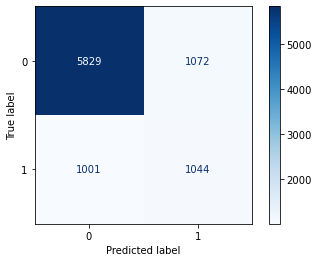

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      6901
           1       0.49      0.51      0.50      2045

    accuracy                           0.77      8946
   macro avg       0.67      0.68      0.68      8946
weighted avg       0.77      0.77      0.77      8946

roc_auc_score:  0.6775868208037601


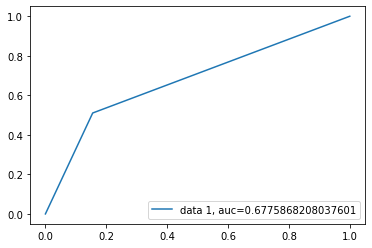

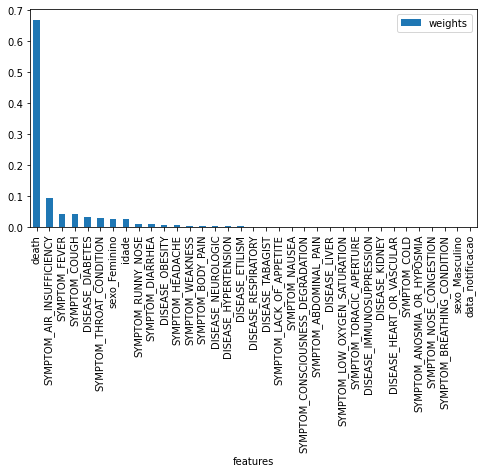

Início do período:  2020-03-27 00:00:00
Final do período:  2020-06-25 00:00:00
########################################

best_score: 0.9438975628497218
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9435236338578908
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9438011563974253
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9439248145270961
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9438413455285737
best_params_: {'lear

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


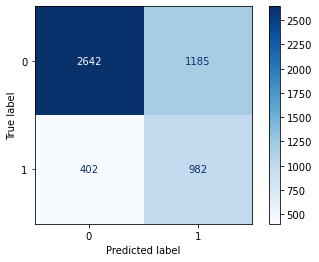

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      3827
           1       0.45      0.71      0.55      1384

    accuracy                           0.70      5211
   macro avg       0.66      0.70      0.66      5211
weighted avg       0.76      0.70      0.71      5211

roc_auc_score:  0.6999477775042253


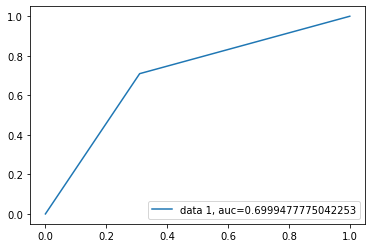

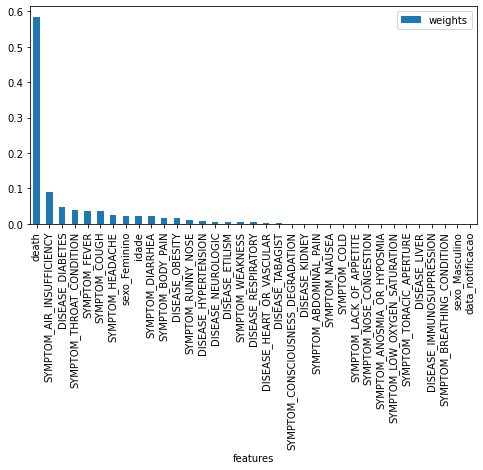

Início do período:  2020-04-26 00:00:00
Final do período:  2020-07-25 00:00:00
########################################

best_score: 0.8946526275384621
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.8946877548000625
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.8940757355168867
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.894472914991686
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.8953667969583435
best_params_: {'learn

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


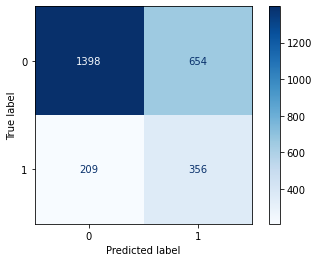

              precision    recall  f1-score   support

           0       0.87      0.68      0.76      2052
           1       0.35      0.63      0.45       565

    accuracy                           0.67      2617
   macro avg       0.61      0.66      0.61      2617
weighted avg       0.76      0.67      0.70      2617

roc_auc_score:  0.6556875226414118


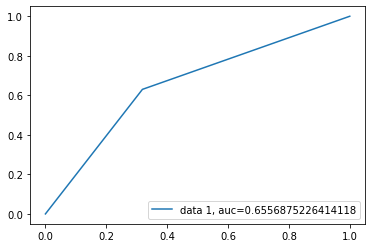

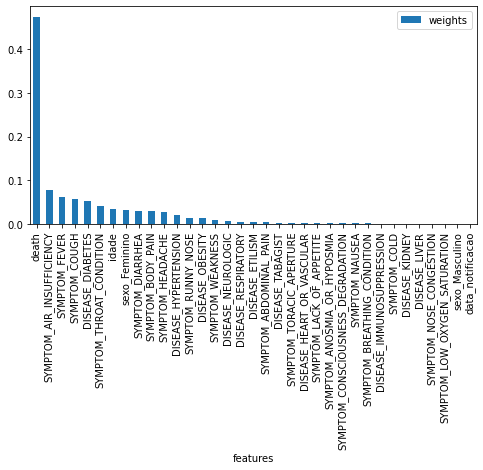

Início do período:  2020-05-26 00:00:00
Final do período:  2020-08-24 00:00:00
########################################

best_score: 0.9012274179560136
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.9040529459869283
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.9022476604667993
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.9011692522190513
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.902018221681845
best_params_: {'learn

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


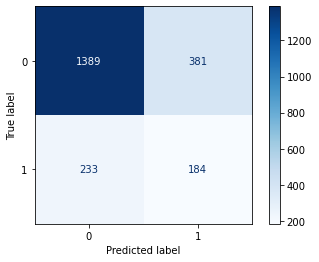

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1770
           1       0.33      0.44      0.37       417

    accuracy                           0.72      2187
   macro avg       0.59      0.61      0.60      2187
weighted avg       0.76      0.72      0.73      2187

roc_auc_score:  0.6129963825549729


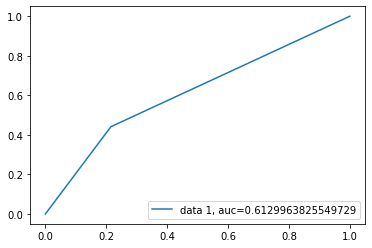

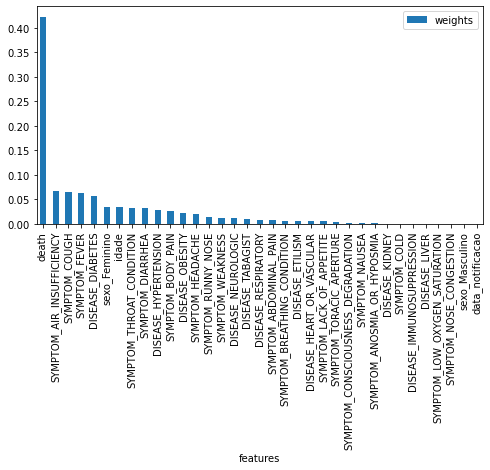

Início do período:  2020-06-25 00:00:00
Final do período:  2020-09-23 00:00:00
########################################

best_score: 0.944765590677636
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.94566404402203
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.94484120682447
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9437516410612863
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9442849039949376
best_params_: {'learning_

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


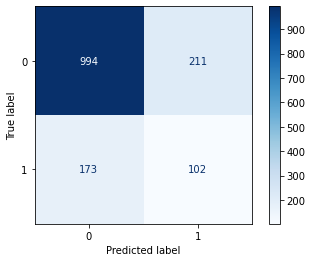

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1205
           1       0.33      0.37      0.35       275

    accuracy                           0.74      1480
   macro avg       0.59      0.60      0.59      1480
weighted avg       0.75      0.74      0.75      1480

roc_auc_score:  0.5979026782346284


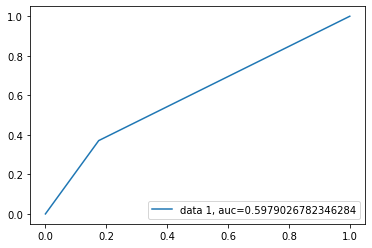

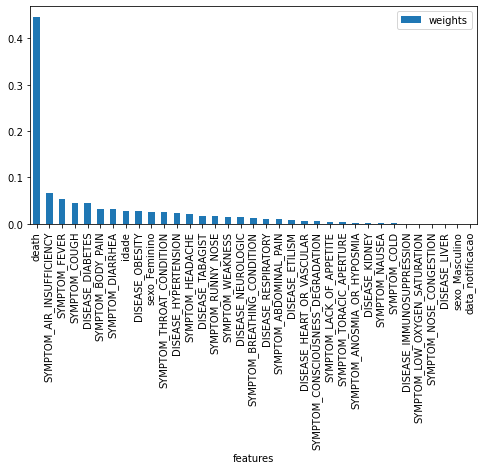

Início do período:  2020-07-25 00:00:00
Final do período:  2020-10-23 00:00:00
########################################

best_score: 0.9562930301164341
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9568406865064288
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9557476555283351
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9574097327946152
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.957068962435956
best_params_: {'learn

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


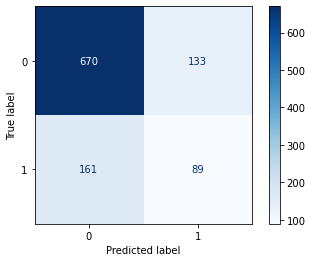

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       803
           1       0.40      0.36      0.38       250

    accuracy                           0.72      1053
   macro avg       0.60      0.60      0.60      1053
weighted avg       0.71      0.72      0.71      1053

roc_auc_score:  0.5951855541718555


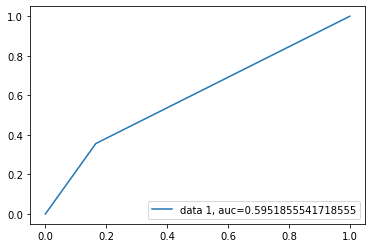

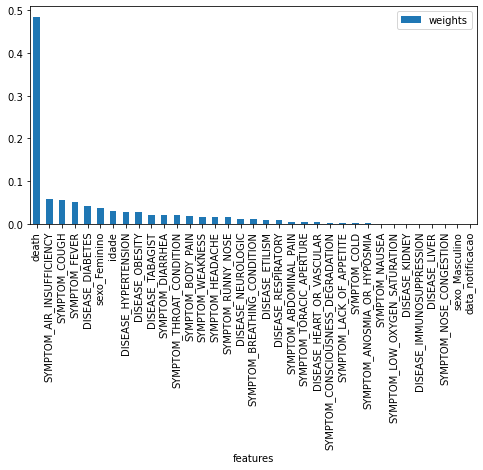

Início do período:  2020-08-24 00:00:00
Final do período:  2020-11-22 00:00:00
########################################

best_score: 0.9525329539048026
best_params_: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.9513302370533439
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9516470240811834
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9508631104190716
best_params_: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.9515611157346505
best_params_: {'le

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


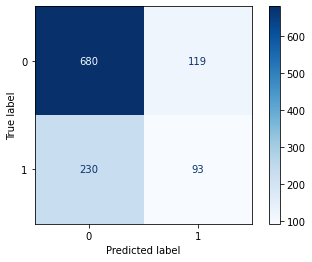

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       799
           1       0.44      0.29      0.35       323

    accuracy                           0.69      1122
   macro avg       0.59      0.57      0.57      1122
weighted avg       0.66      0.69      0.67      1122

roc_auc_score:  0.5694947631908307


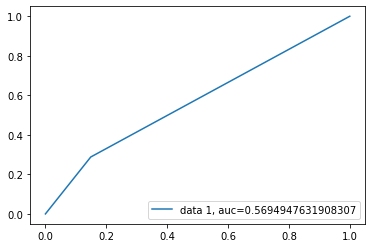

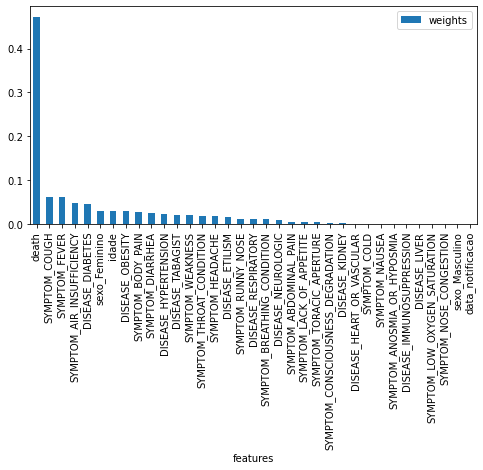

Início do período:  2020-09-23 00:00:00
Final do período:  2020-12-22 00:00:00
########################################

best_score: 0.9168595733831559
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9182965104971285
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9172169685353196
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9201693961316874
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9166117700054116
best_params_: {'lear

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


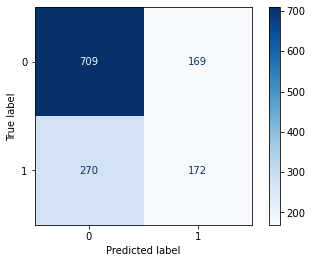

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       878
           1       0.50      0.39      0.44       442

    accuracy                           0.67      1320
   macro avg       0.61      0.60      0.60      1320
weighted avg       0.65      0.67      0.66      1320

roc_auc_score:  0.5983286778878364


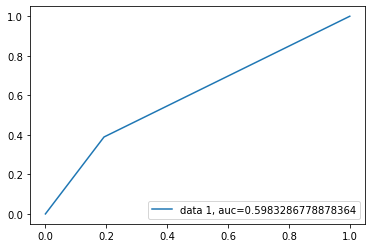

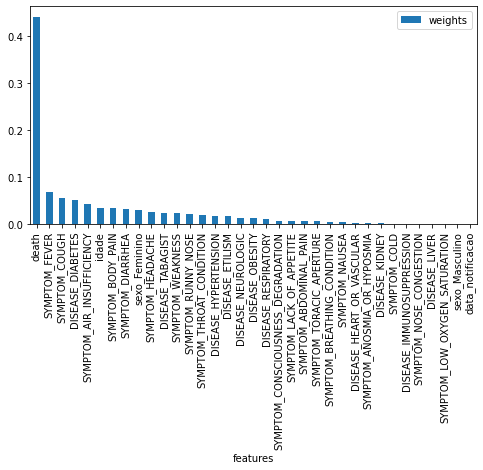

Início do período:  2020-10-23 00:00:00
Final do período:  2021-01-21 00:00:00
########################################

best_score: 0.9130313996900534
best_params_: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.9117471680486791
best_params_: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.9137520084463766
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.912251460002147
best_params_: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.9123660965865635
best_params_: {'le

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


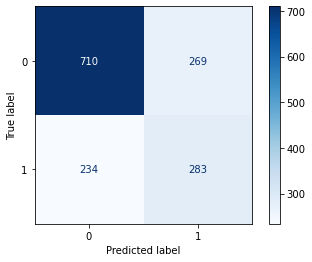

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       979
           1       0.51      0.55      0.53       517

    accuracy                           0.66      1496
   macro avg       0.63      0.64      0.63      1496
weighted avg       0.67      0.66      0.67      1496

roc_auc_score:  0.6363093038923782


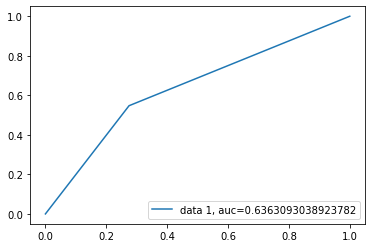

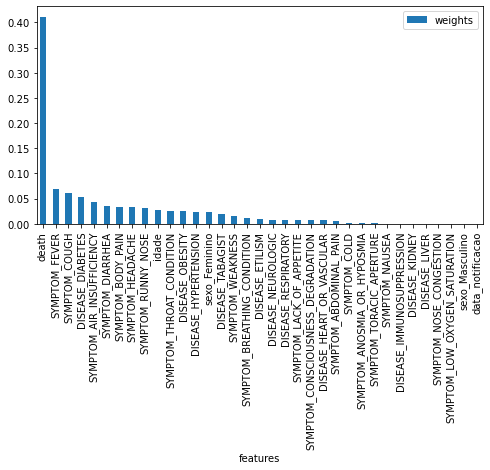

Início do período:  2020-11-22 00:00:00
Final do período:  2021-02-20 00:00:00
########################################

best_score: 0.8831007788604042
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.8823755860620034
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.8829588503013858
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.8822443230122119
best_params_: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.8837148957902462
best_params_: {'lea

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


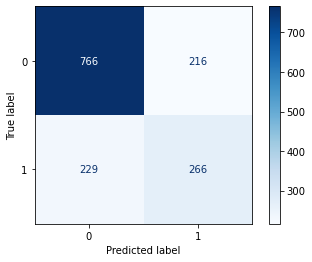

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       982
           1       0.55      0.54      0.54       495

    accuracy                           0.70      1477
   macro avg       0.66      0.66      0.66      1477
weighted avg       0.70      0.70      0.70      1477

roc_auc_score:  0.6587072352856467


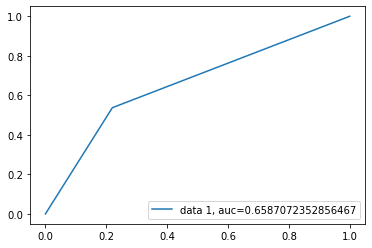

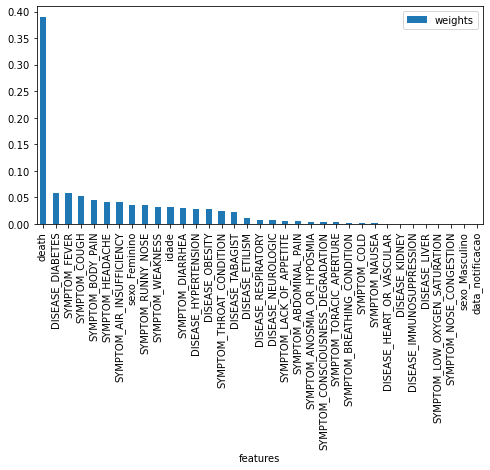

Início do período:  2020-12-22 00:00:00
Final do período:  2021-03-22 00:00:00
########################################

best_score: 0.8705741872474556
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.8667812921406176
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.8688675745686837
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.8672579676455866
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.8689275145448754
best_params_: {'lear

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


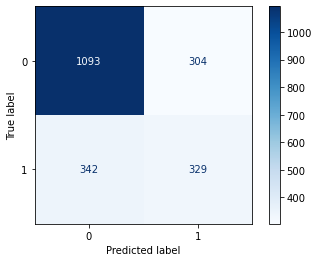

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1397
           1       0.52      0.49      0.50       671

    accuracy                           0.69      2068
   macro avg       0.64      0.64      0.64      2068
weighted avg       0.68      0.69      0.69      2068

roc_auc_score:  0.6363519016158747


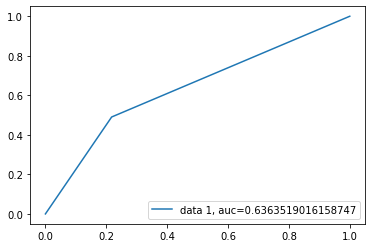

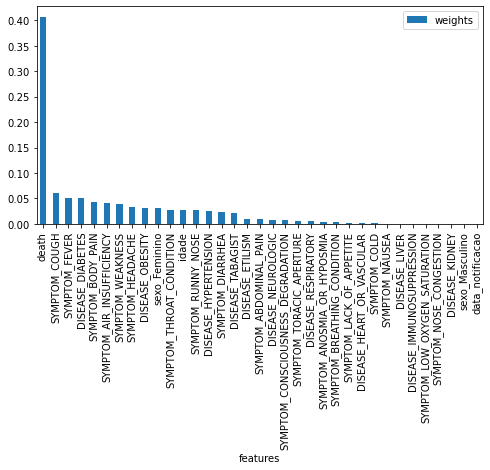

Início do período:  2021-01-21 00:00:00
Final do período:  2021-04-21 00:00:00
########################################

best_score: 0.8851883062634942
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.8830951295988889
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.8830087448057373
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.8841168397183434
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.8842155496967526
best_params_: {'lear

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


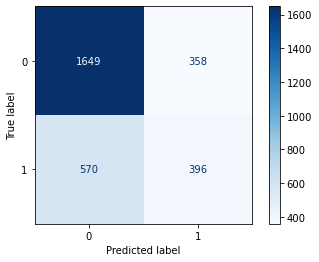

              precision    recall  f1-score   support

           0       0.74      0.82      0.78      2007
           1       0.53      0.41      0.46       966

    accuracy                           0.69      2973
   macro avg       0.63      0.62      0.62      2973
weighted avg       0.67      0.69      0.68      2973

roc_auc_score:  0.6157811015483077


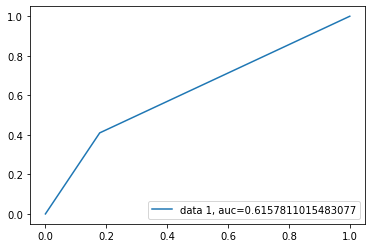

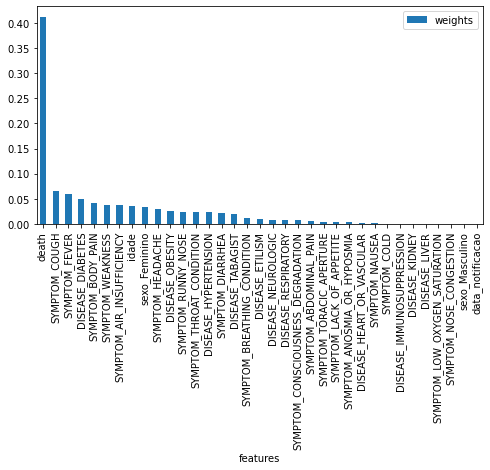

Início do período:  2021-02-20 00:00:00
Final do período:  2021-05-21 00:00:00
########################################

best_score: 0.8815455623064077
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.8824413399206751
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.8797216101598547
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.8819540107205205
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.8813937129595315
best_params_: {'lear

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


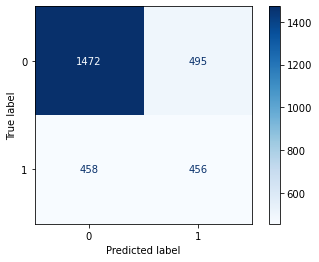

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      1967
           1       0.48      0.50      0.49       914

    accuracy                           0.67      2881
   macro avg       0.62      0.62      0.62      2881
weighted avg       0.67      0.67      0.67      2881

roc_auc_score:  0.6236268228839306


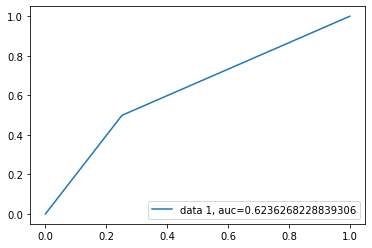

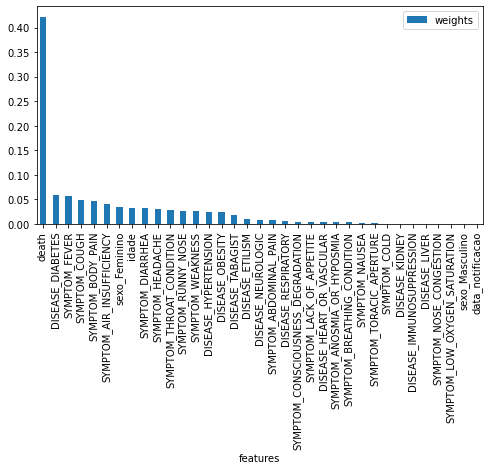

Início do período:  2021-03-22 00:00:00
Final do período:  2021-06-20 00:00:00
########################################

best_score: 0.8759299729271127
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.8768648624462838
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.8765157813392207
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.876327872937327
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.8763830548503118
best_params_: {'learn

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


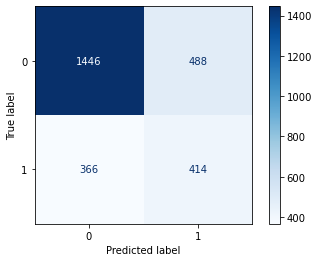

              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1934
           1       0.46      0.53      0.49       780

    accuracy                           0.69      2714
   macro avg       0.63      0.64      0.63      2714
weighted avg       0.70      0.69      0.69      2714

roc_auc_score:  0.6392212234507995


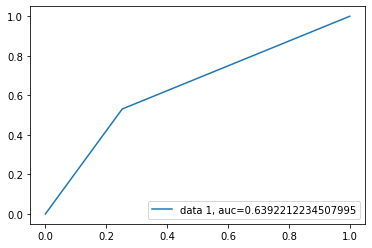

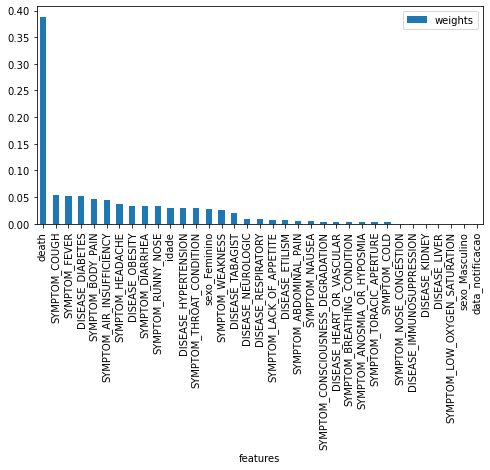

Início do período:  2021-04-21 00:00:00
Final do período:  2021-07-20 00:00:00
########################################

best_score: 0.8932690365572522
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.8934592533179982
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.8927282898752503
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.8937299595938194
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.8923882087265916
best_params_: {'lear

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


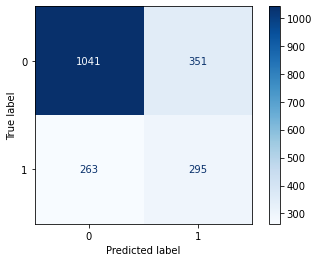

              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1392
           1       0.46      0.53      0.49       558

    accuracy                           0.69      1950
   macro avg       0.63      0.64      0.63      1950
weighted avg       0.70      0.69      0.69      1950

roc_auc_score:  0.6382593313558275


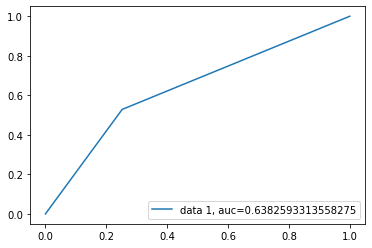

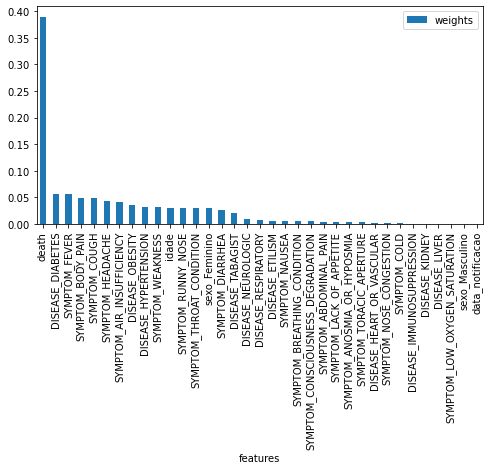

Início do período:  2021-05-21 00:00:00
Final do período:  2021-08-19 00:00:00
########################################

best_score: 0.9038399134667389
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.9045666576527852
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.9038399134667386
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.9049131287182262
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9047407382368847
best_params_: {'lear

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


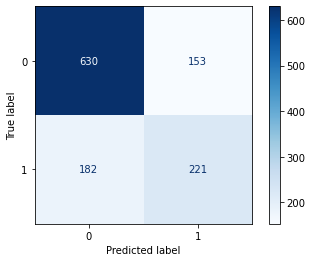

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       783
           1       0.59      0.55      0.57       403

    accuracy                           0.72      1186
   macro avg       0.68      0.68      0.68      1186
weighted avg       0.71      0.72      0.71      1186

roc_auc_score:  0.6764923989618095


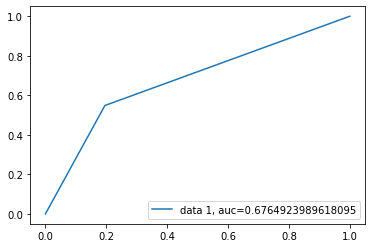

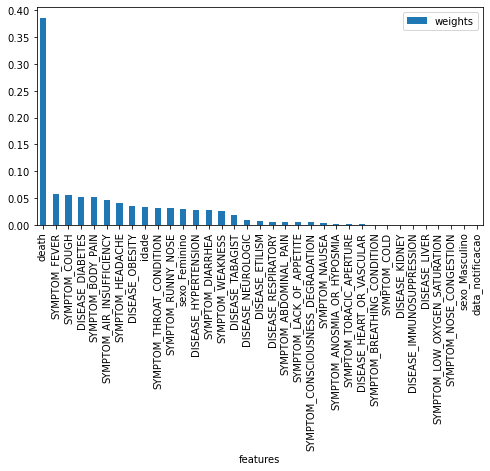

Início do período:  2021-06-20 00:00:00
Final do período:  2021-09-18 00:00:00
########################################

best_score: 0.8999044736907926
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.8993505215926308
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.8972169629713005
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.8989026254716576
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.8977054145049024
best_params_: {'lear

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


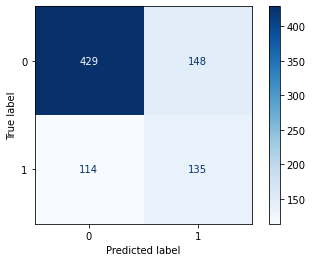

              precision    recall  f1-score   support

           0       0.79      0.74      0.77       577
           1       0.48      0.54      0.51       249

    accuracy                           0.68       826
   macro avg       0.63      0.64      0.64       826
weighted avg       0.70      0.68      0.69       826

roc_auc_score:  0.6428347706249609


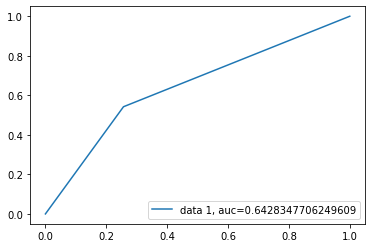

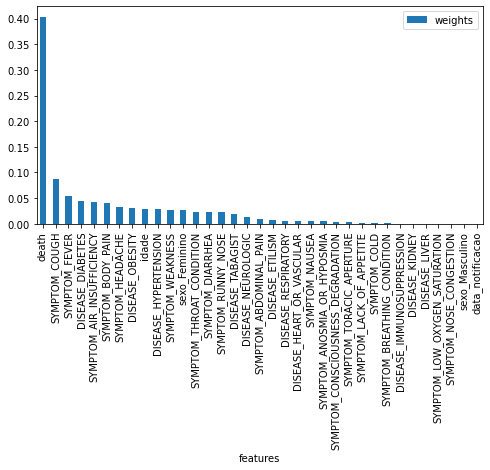

Início do período:  2021-07-20 00:00:00
Final do período:  2021-10-18 00:00:00
########################################

best_score: 0.9039136754592084
best_params_: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.9046891918767817
best_params_: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.9043480235810026
best_params_: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.905774816648129
best_params_: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.9043855901511748
best_params_: {'l

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


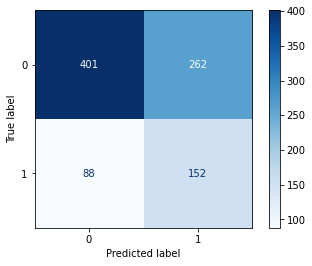

              precision    recall  f1-score   support

           0       0.82      0.60      0.70       663
           1       0.37      0.63      0.46       240

    accuracy                           0.61       903
   macro avg       0.59      0.62      0.58       903
weighted avg       0.70      0.61      0.63       903

roc_auc_score:  0.619079939668175


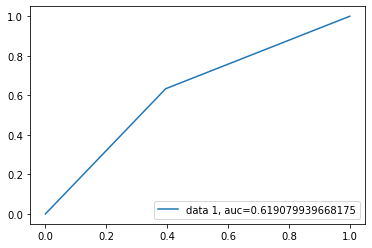

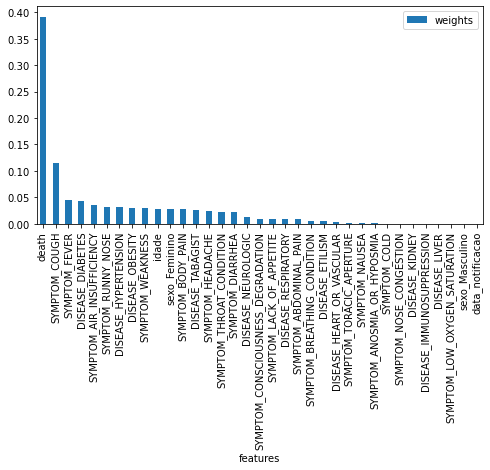

Início do período:  2021-08-19 00:00:00
Final do período:  2021-11-17 00:00:00
########################################

best_score: 0.9297119140625
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.929364013671875
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9265625
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.92880859375
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.92777099609375
best_params_: {'learning_rate': 0.1, 'ma

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


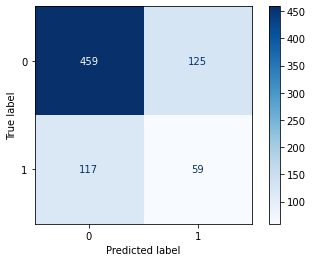

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       584
           1       0.32      0.34      0.33       176

    accuracy                           0.68       760
   macro avg       0.56      0.56      0.56       760
weighted avg       0.69      0.68      0.68       760

roc_auc_score:  0.5605930884184309


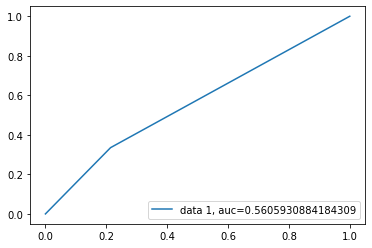

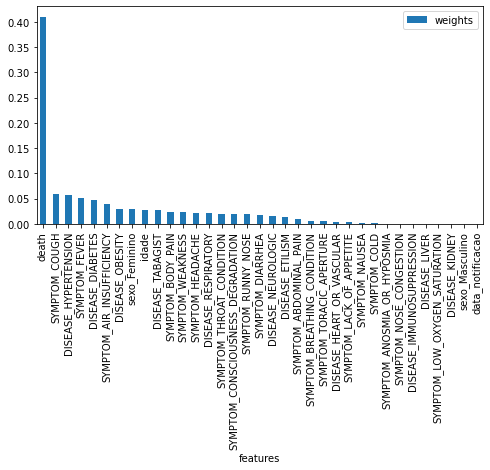

Início do período:  2021-09-18 00:00:00
Final do período:  2021-12-17 00:00:00
########################################

best_score: 0.9280469703224622
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.9268697766157515
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.9278722076968947
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.9293339755057108
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.9277909270216963
best_params_: {'lear

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


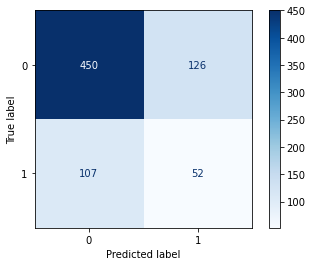

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       576
           1       0.29      0.33      0.31       159

    accuracy                           0.68       735
   macro avg       0.55      0.55      0.55       735
weighted avg       0.70      0.68      0.69       735

roc_auc_score:  0.5541470125786163


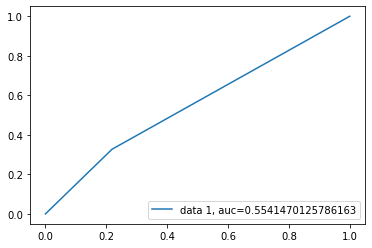

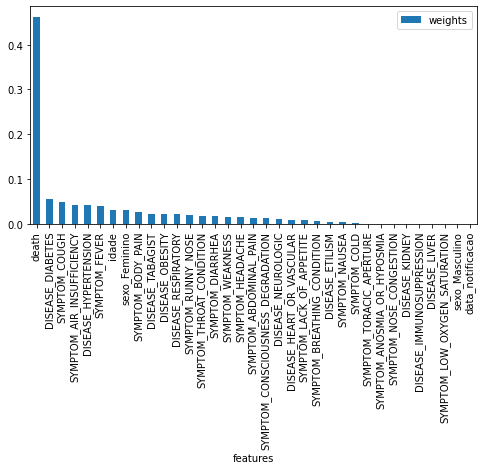

Início do período:  2021-10-18 00:00:00
Final do período:  2022-01-16 00:00:00
########################################

best_score: 0.9590444328824141
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.9579834547346513
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.958517273673257
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.9575968782518209
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9585528616024975
best_params_: {'learn

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


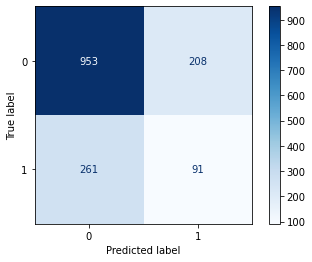

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1161
           1       0.30      0.26      0.28       352

    accuracy                           0.69      1513
   macro avg       0.54      0.54      0.54      1513
weighted avg       0.67      0.69      0.68      1513

roc_auc_score:  0.5396834135932973


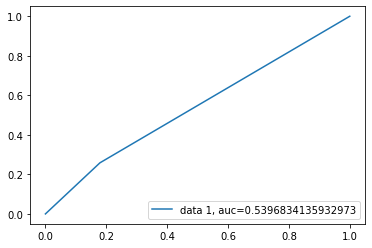

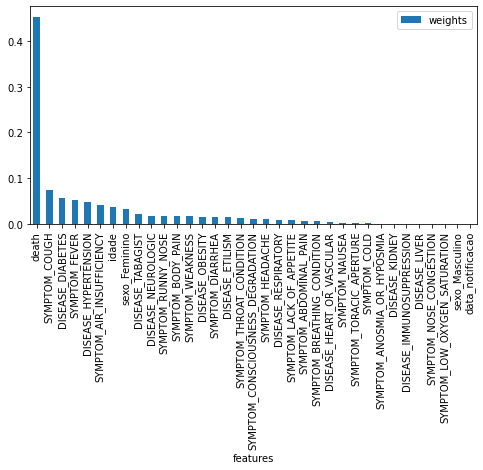

Início do período:  2021-11-17 00:00:00
Final do período:  2022-02-15 00:00:00
########################################

best_score: 0.9322904983175773
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9338567537253646
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9318138118891204
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9335122576510175
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9292501201730492
best_params_: {'lear

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


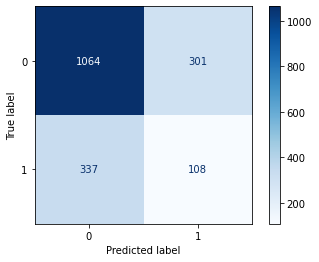

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1365
           1       0.26      0.24      0.25       445

    accuracy                           0.65      1810
   macro avg       0.51      0.51      0.51      1810
weighted avg       0.64      0.65      0.64      1810

roc_auc_score:  0.5110919043503312


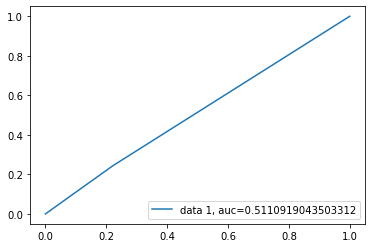

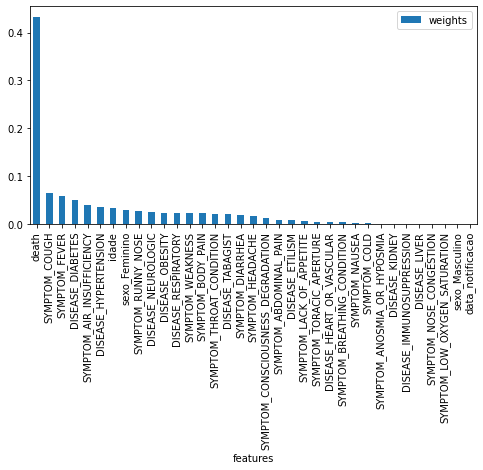

Início do período:  2021-12-17 00:00:00
Final do período:  2022-03-17 00:00:00
########################################

best_score: 0.9084647557142096
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.905102829133145
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9044554851084236
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.90492967126645
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9080491768341414
best_params_: {'learnin

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


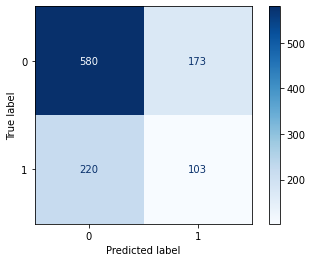

              precision    recall  f1-score   support

           0       0.72      0.77      0.75       753
           1       0.37      0.32      0.34       323

    accuracy                           0.63      1076
   macro avg       0.55      0.54      0.55      1076
weighted avg       0.62      0.63      0.63      1076

roc_auc_score:  0.5445688864767967


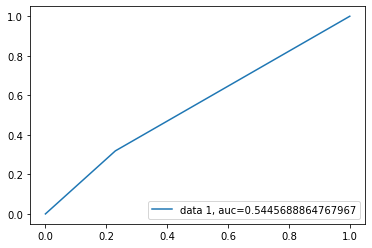

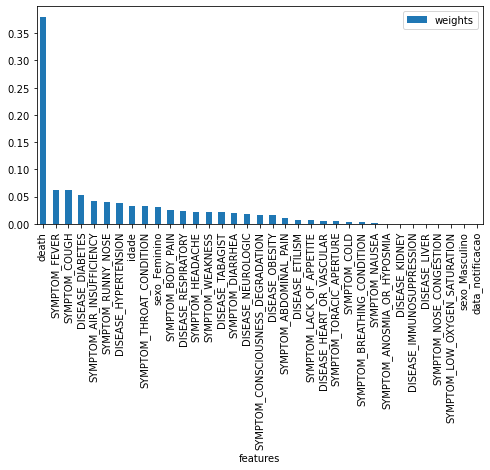

Início do período:  2022-01-16 00:00:00
Final do período:  2022-04-16 00:00:00
########################################

best_score: 0.9119129393147771
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.9157948663545991
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9125884670524046
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9143110274215817
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.9124598680711185
best_params_: {'lear

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


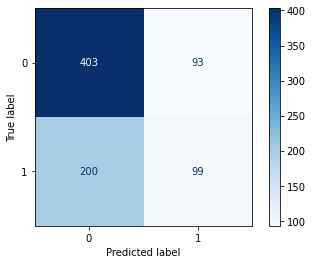

              precision    recall  f1-score   support

           0       0.67      0.81      0.73       496
           1       0.52      0.33      0.40       299

    accuracy                           0.63       795
   macro avg       0.59      0.57      0.57       795
weighted avg       0.61      0.63      0.61       795

roc_auc_score:  0.5718018394648829


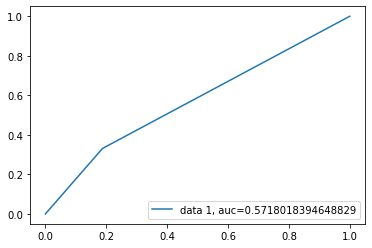

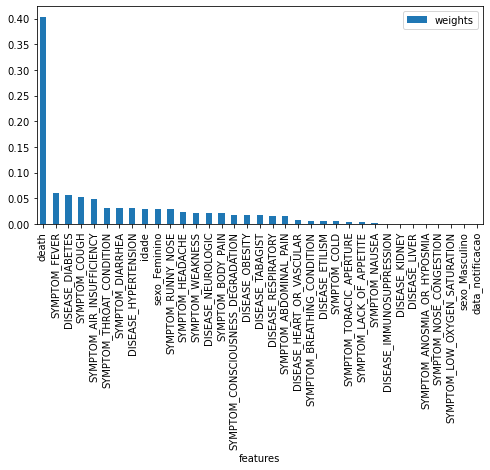

Início do período:  2022-02-15 00:00:00
Final do período:  2022-05-16 00:00:00
########################################

best_score: 0.8515011823772414
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.8499933683355817
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.8519066843942378
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.8541646852547368
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.8504975365792904
best_params_: {'lear

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


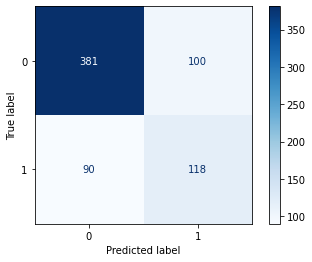

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       481
           1       0.54      0.57      0.55       208

    accuracy                           0.72       689
   macro avg       0.68      0.68      0.68       689
weighted avg       0.73      0.72      0.73       689

roc_auc_score:  0.6797037422037422


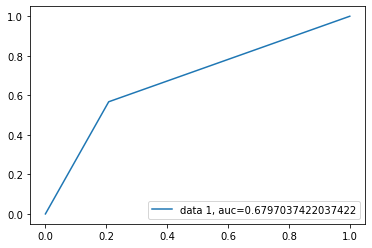

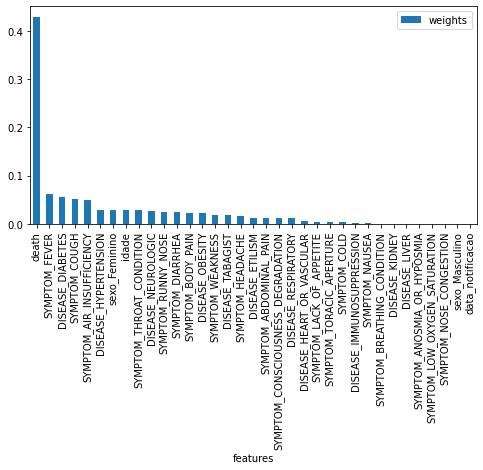

Início do período:  2022-03-17 00:00:00
Final do período:  2022-06-15 00:00:00
########################################

best_score: 0.8643155337199314
best_params_: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.8610531661655212
best_params_: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.8622275021477662
best_params_: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.6}
########################################

########################################

best_score: 0.8628414053550975
best_params_: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.8625881479095074
best_params_: {'l

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


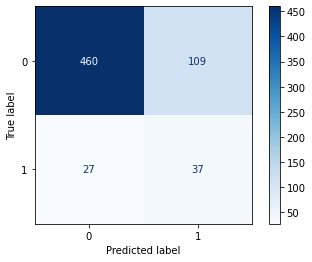

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       569
           1       0.25      0.58      0.35        64

    accuracy                           0.79       633
   macro avg       0.60      0.69      0.61       633
weighted avg       0.87      0.79      0.82       633

roc_auc_score:  0.6932804261862917


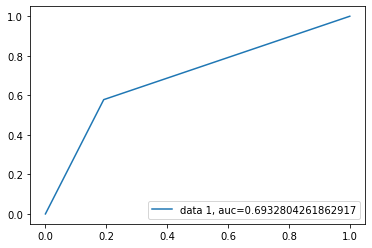

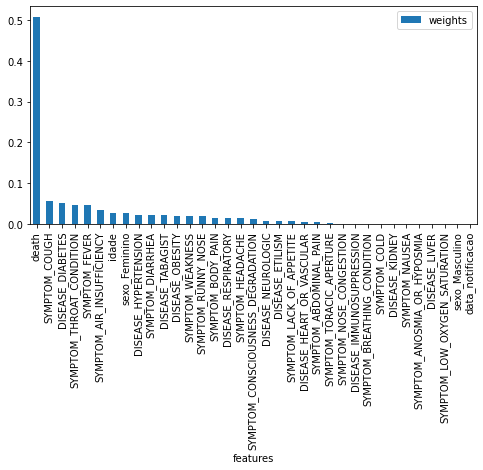

Início do período:  2022-04-16 00:00:00
Final do período:  2022-07-15 00:00:00
########################################

best_score: 0.9571437267383214
best_params_: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.957030824260554
best_params_: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.9578849119389661
best_params_: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.9568489338759608
best_params_: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.9563621053485918
best_params_: {'l

c:\Users\maril\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


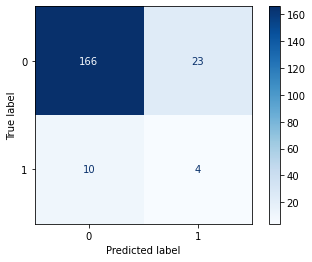

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       189
           1       0.15      0.29      0.20        14

    accuracy                           0.84       203
   macro avg       0.55      0.58      0.55       203
weighted avg       0.89      0.84      0.86       203

roc_auc_score:  0.582010582010582


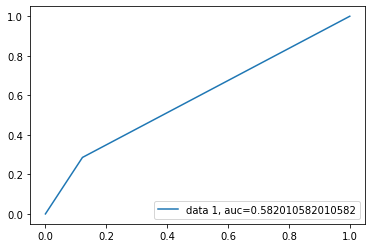

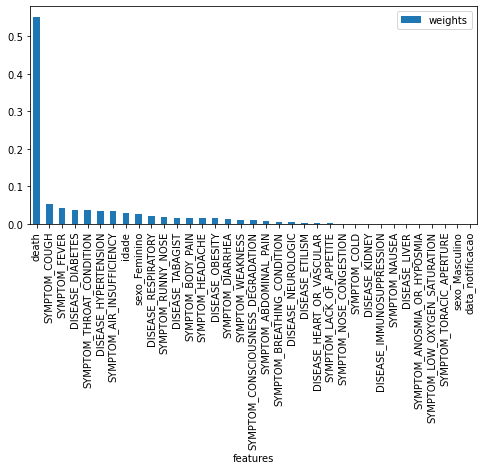

Início do período:  2022-05-16 00:00:00
Final do período:  2022-08-14 00:00:00
########################################

best_score: 0.9938066893424036
best_params_: {'learning_rate': 0.5, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.4}
########################################

########################################

best_score: 0.9939200680272109
best_params_: {'learning_rate': 0.5, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.4}
########################################

########################################

best_score: 0.9938633786848072
best_params_: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.6}
########################################

########################################

best_score: 0.9940334467120181
best_params_: {'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 800, 'subsample': 0.6}
########################################

########################################

best_score: 0.9938066893424036
best_params_: {'lear

ValueError: Found array with 0 sample(s) (shape=(0, 33)) while a minimum of 1 is required by GradientBoostingClassifier.

In [9]:
results_accuracy_90_gb, results_f1_90_gb, results_precision_90_gb, results_recall_90_gb, results_roc_auc_90_gb = apply_periodos(90, df)

### Lista com as métricas de cada período:

In [ ]:
list_periodos_90 = [['26/02/2020 até 26/05/2020'], ['27/03/2020 até 25/06/2020'], ['26/04/2020 até 25/07/2020'], ['26/05/2020 até 24/08/2020'], 
['25/06/2020 até 23/09/2020'], ['25/07/2020 até 23/10/2020'], ['24/08/2020 até 22/11/2020'], ['23/09/2020 até 22/12/2020'], ['23/10/2020 até 21/01/2021'], 
['22/11/2020 até 20/02/2021'], ['22/12/2020 até 22/03/2021'], ['21/01/2021 até 21/04/2021'], ['20/02/2021 até 21/05/2021'], ['22/03/2021 até 20/06/2021'], 
['21/04/2021 até 20/07/2021'], ['21/05/2021 até 19/08/2021'], ['20/06/2021 até 18/09/2021'], ['20/07/2021 até 18/10/2021'], ['19/08/2021 até 17/11/2021'], 
['18/09/2021 até 17/12/2021'], ['18/10/2021 até 16/01/2022'], ['17/11/2021 até 15/02/2022'], ['17/12/2021 até 17/03/2022'], ['16/01/2022 até 16/04/2022'], 
['15/02/2022 até 16/05/2022'], ['17/03/2022 até 15/06/2022']]

In [ ]:
metricas_accuracy_90_gb = pd.DataFrame(results_accuracy_90_gb)
metricas_accuracy_90_gb.columns = ['accuracy score']
#metricas_accuracy_90_gb
metricas_f1_90_gb = pd.DataFrame(results_f1_90_gb)
metricas_f1_90_gb.columns = ['f1 score', 'f1 score macro', 'f1 score micro', 'f1 score weighted']
#metricas_f1_90_gb
metricas_precision_90_gb = pd.DataFrame(results_precision_90_gb)
metricas_precision_90_gb.columns = ['precision score', 'precision score macro', 'precision score micro', 'precision score weighted']
#metricas_precision_90_gb
metricas_recall_90_gb = pd.DataFrame(results_recall_90_gb)
metricas_recall_90_gb.columns = ['recall score', 'recall score macro', 'recall score micro', 'recall score weighted']
#metricas_recall_90_gb
metricas_roc_auc_90_gb = pd.DataFrame(results_roc_auc_90_gb)
metricas_roc_auc_90_gb.columns = ['roc_auc score']
#metricas_roc_auc_90_gb
metricas_90_gb = pd.concat([metricas_accuracy_90_gb, metricas_f1_90_gb, metricas_precision_90_gb, metricas_recall_90_gb, metricas_roc_auc_90_gb], axis=1)
metricas_90_gb

In [ ]:
coluna_periodos90 = pd.DataFrame(list_periodos_90)
coluna_periodos90.columns = ['Períodos']
#coluna_periodos90
metricas_90_gb_final = pd.concat([coluna_periodos90, metricas_90_gb], axis=1)
metricas_90_gb_final

In [ ]:
metricas_90_gb_final.sort_values(by=['roc_auc score'], ascending=False)

In [ ]:
metricas_90_gb_final.sort_values(by=['f1 score macro', 'roc_auc score'], ascending=False)

### Aplicação do modelo considerando períodos de 120 dias, deslocando cada período em 30 dias:

In [ ]:
results_accuracy_120_gb, results_f1_120_gb, results_precision_120_gb, results_recall_120_gb, results_roc_auc_120_gb = apply_periodos(120, df)

### Lista com as métricas de cada período:

In [ ]:
list_periodos_120 = [['26/02/2020 até 25/06/2020'], ['27/03/2020 até 25/07/2020'], ['26/04/2020 até 24/08/2020'], ['26/05/2020 até 23/09/2020'], 
['25/06/2020 até 23/10/2020'], ['25/07/2020 até 22/11/2020'], ['24/08/2020 até 22/12/2020'], ['23/09/2020 até 21/01/2021'], ['23/10/2020 até 20/02/2021'], 
['22/11/2020 até 22/03/2021'], ['22/12/2020 até 21/04/2021'], ['21/01/2021 até 21/05/2021'], ['20/02/2021 até 20/06/2021'], ['22/03/2021 até 20/07/2021'], 
['21/04/2021 até 19/08/2021'], ['21/05/2021 até 18/09/2021'], ['20/06/2021 até 18/10/2021'], ['20/07/2021 até 17/11/2021'], ['19/08/2021 até 17/12/2021'], 
['18/09/2021 até 16/01/2022'], ['18/10/2021 até 15/02/2022'], ['17/11/2021 até 17/03/2022'], ['17/12/2021 até 16/04/2022'], ['16/01/2022 até 16/05/2022'], 
['15/02/2022 até 15/06/2022']]

In [ ]:
metricas_accuracy_120_gb = pd.DataFrame(results_accuracy_120_gb)
metricas_accuracy_120_gb.columns = ['accuracy score']
#metricas_accuracy_120_gb
metricas_f1_120_gb = pd.DataFrame(results_f1_120_gb)
metricas_f1_120_gb.columns = ['f1 score', 'f1 score macro', 'f1 score micro', 'f1 score weighted']
#metricas_f1_120_gb
metricas_precision_120_gb = pd.DataFrame(results_precision_120_gb)
metricas_precision_120_gb.columns = ['precision score', 'precision score macro', 'precision score micro', 'precision score weighted']
#metricas_precision_120_gb
metricas_recall_120_gb = pd.DataFrame(results_recall_120_gb)
metricas_recall_120_gb.columns = ['recall score', 'recall score macro', 'recall score micro', 'recall score weighted']
#metricas_recall_120_gb
metricas_roc_auc_120_gb = pd.DataFrame(results_roc_auc_120_gb)
metricas_roc_auc_120_gb.columns = ['roc_auc score']
#metricas_roc_auc_120_gb
metricas_120_gb = pd.concat([metricas_accuracy_120_gb, metricas_f1_120_gb, metricas_precision_120_gb, metricas_recall_120_gb, metricas_roc_auc_120_gb], axis=1)
metricas_120_gb

In [ ]:
coluna_periodos120 = pd.DataFrame(list_periodos_120)
coluna_periodos120.columns = ['Períodos']
#coluna_periodos120.columns
metricas_120_gb_final = pd.concat([coluna_periodos120, metricas_120_gb], axis=1)
metricas_120_gb_final

In [ ]:
metricas_120_gb_final.sort_values(by=['roc_auc score'], ascending=False)

In [ ]:
metricas_120_gb_final.sort_values(by=['f1 score macro', 'roc_auc score'], ascending=False)